# Heatmap between Input

In [1]:
import pandas as pd

csv_characteristic_path = "runs/raw/tencent/characteristic/1063/1m/characteristic.csv"

csv_characteristic = pd.read_csv(csv_characteristic_path)

In [7]:
from pathlib import Path
import glob
import re

# get every /raw in the path
path_to_glob = "/home/cc/clio/runs/exp/tencent/1063/1m/iops/replayed"

start_indices = []
end_indices = []
types = []
# find /raw directories
for path in Path(path_to_glob).rglob("raw"):
    print(path)
    # get the start and end indices, use regex and extract \d+_\d+
    regex_match = re.search(r"\d+_\d+", str(path))
    # search for gradual, sudden, incremental, or recurring
    type = re.search(r"gradual|sudden|incremental|recurring", str(path))
    types.append(type.group(0))
    start_indices.append(int(regex_match.group(0).split("_")[0]))
    end_indices.append(int(regex_match.group(0).split("_")[1]))
    
print(start_indices)
print(end_indices)
print(types)


/home/cc/clio/runs/exp/tencent/1063/1m/iops/replayed/incremental/1150_1800/raw
/home/cc/clio/runs/exp/tencent/1063/1m/iops/replayed/incremental/11350_11700/raw
/home/cc/clio/runs/exp/tencent/1063/1m/iops/replayed/incremental/3000_3800/raw
/home/cc/clio/runs/exp/tencent/1063/1m/iops/replayed/incremental/5150_5300/raw
/home/cc/clio/runs/exp/tencent/1063/1m/iops/replayed/gradual/2540_2580/raw
/home/cc/clio/runs/exp/tencent/1063/1m/iops/replayed/gradual/6350_6650/raw
/home/cc/clio/runs/exp/tencent/1063/1m/iops/replayed/gradual/8700_8850/raw
/home/cc/clio/runs/exp/tencent/1063/1m/iops/replayed/gradual/550_700/raw
/home/cc/clio/runs/exp/tencent/1063/1m/iops/replayed/gradual/2950_3150/raw
/home/cc/clio/runs/exp/tencent/1063/1m/iops/replayed/recurring/3500_4100/raw
/home/cc/clio/runs/exp/tencent/1063/1m/iops/replayed/recurring/6600_7250/raw
/home/cc/clio/runs/exp/tencent/1063/1m/iops/replayed/recurring/6375_6600/raw
/home/cc/clio/runs/exp/tencent/1063/1m/iops/replayed/sudden/6800_6840/raw
/hom

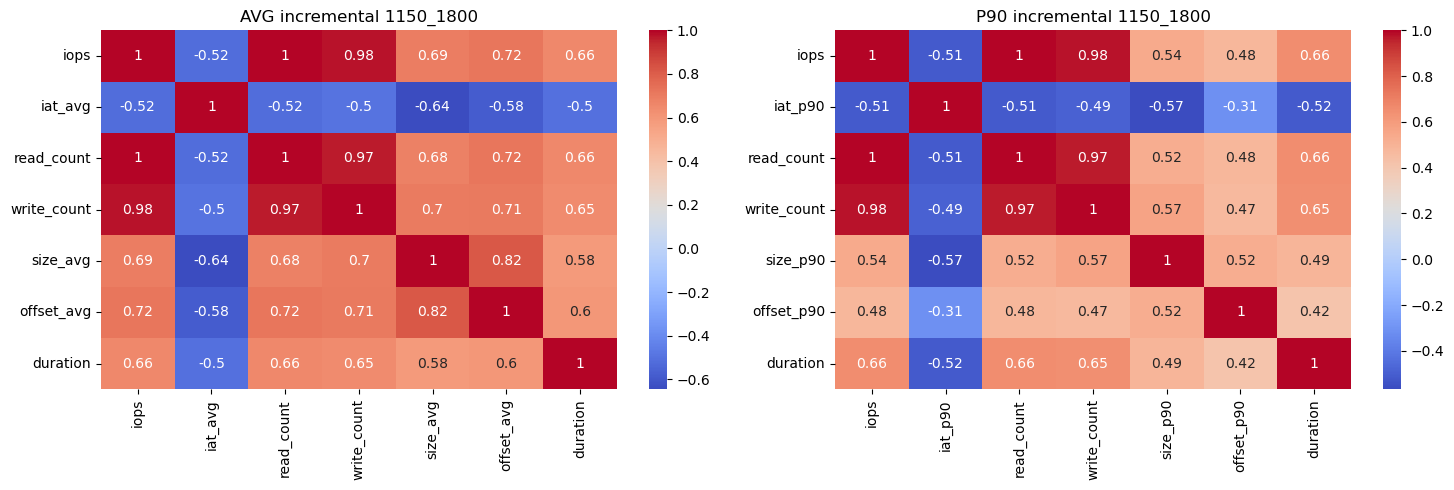

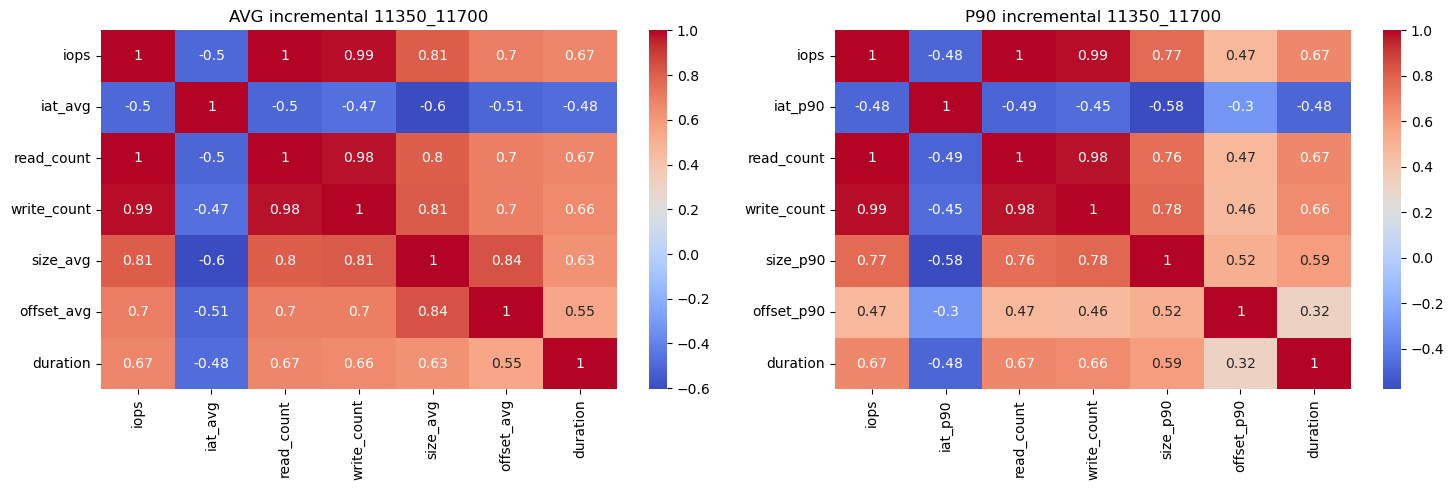

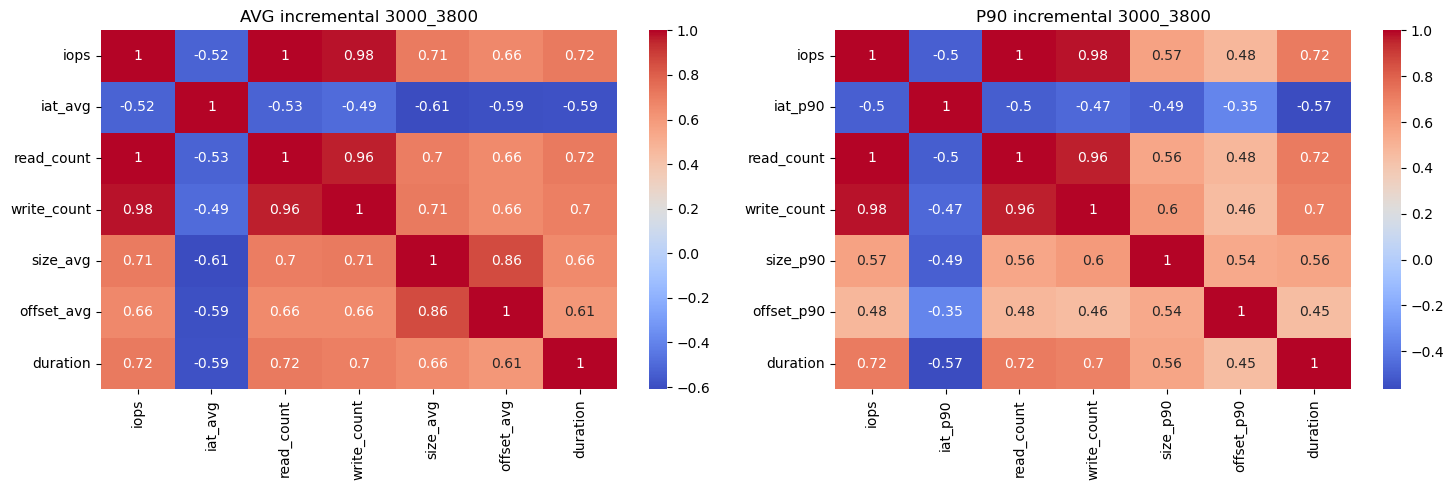

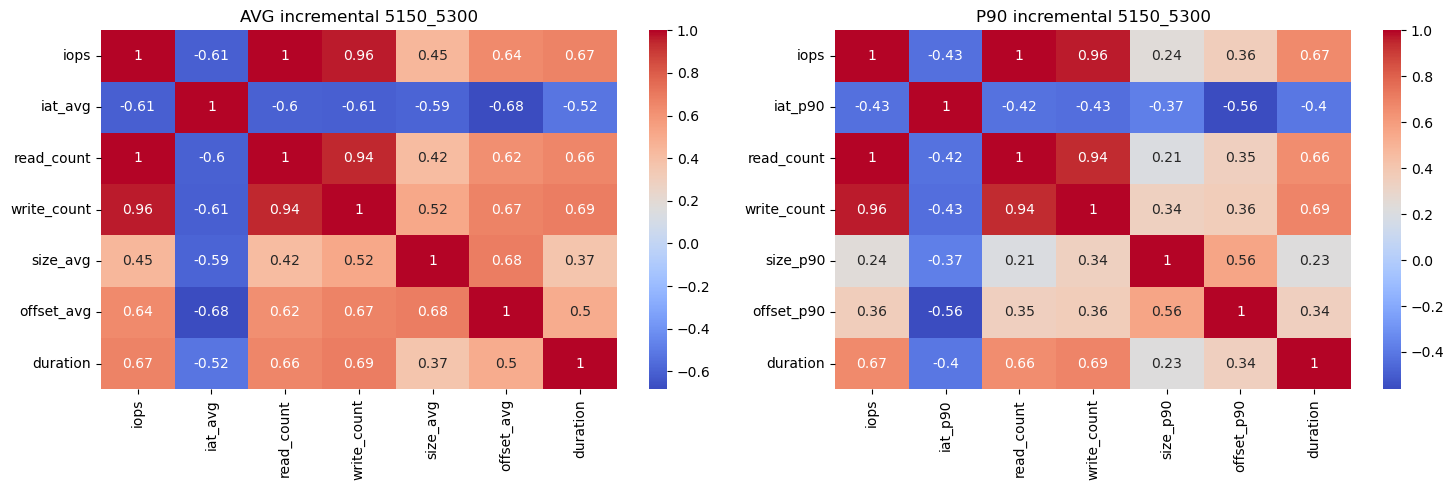

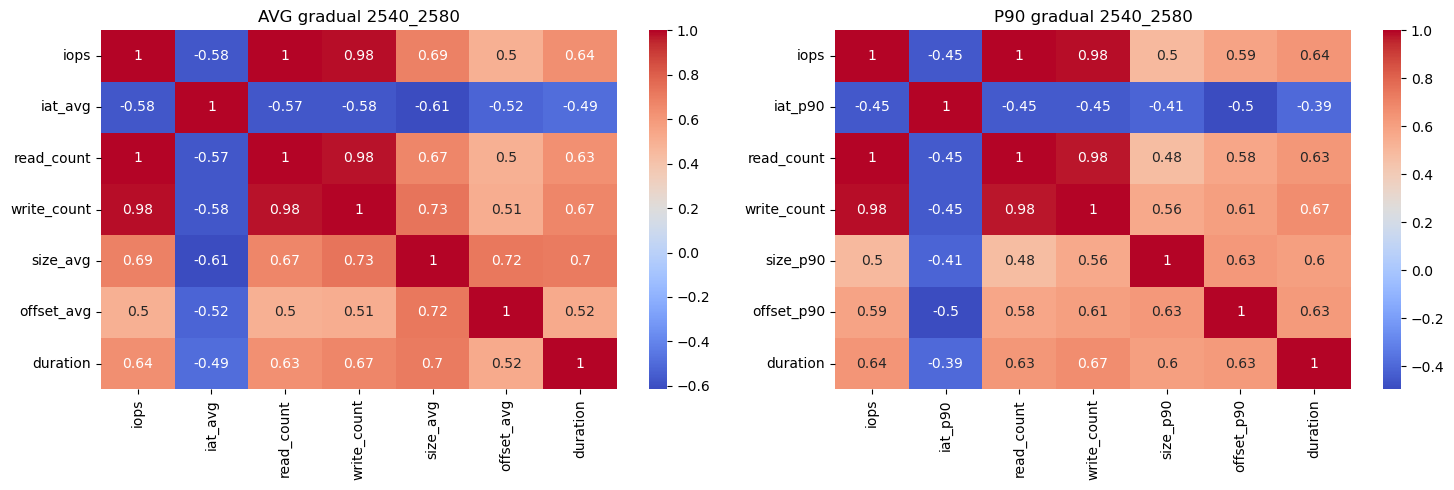

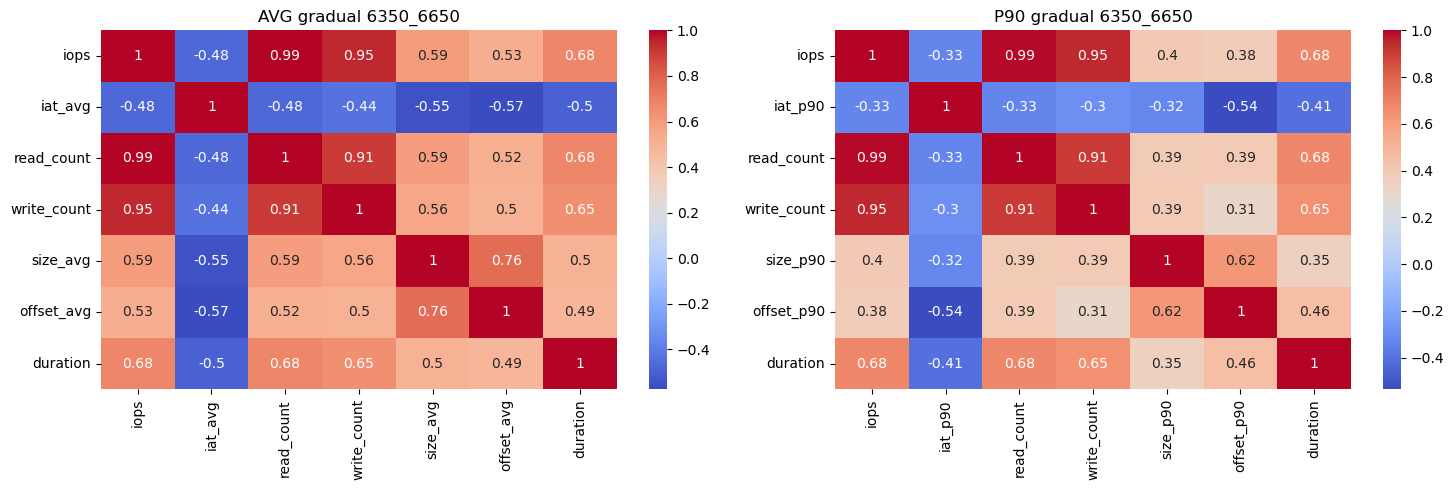

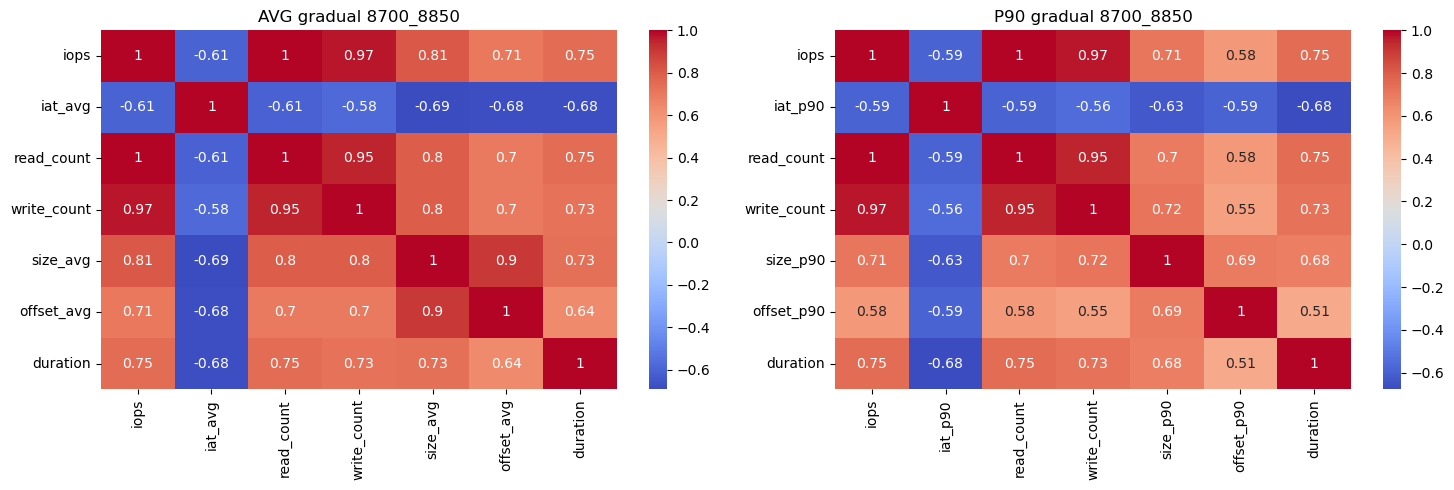

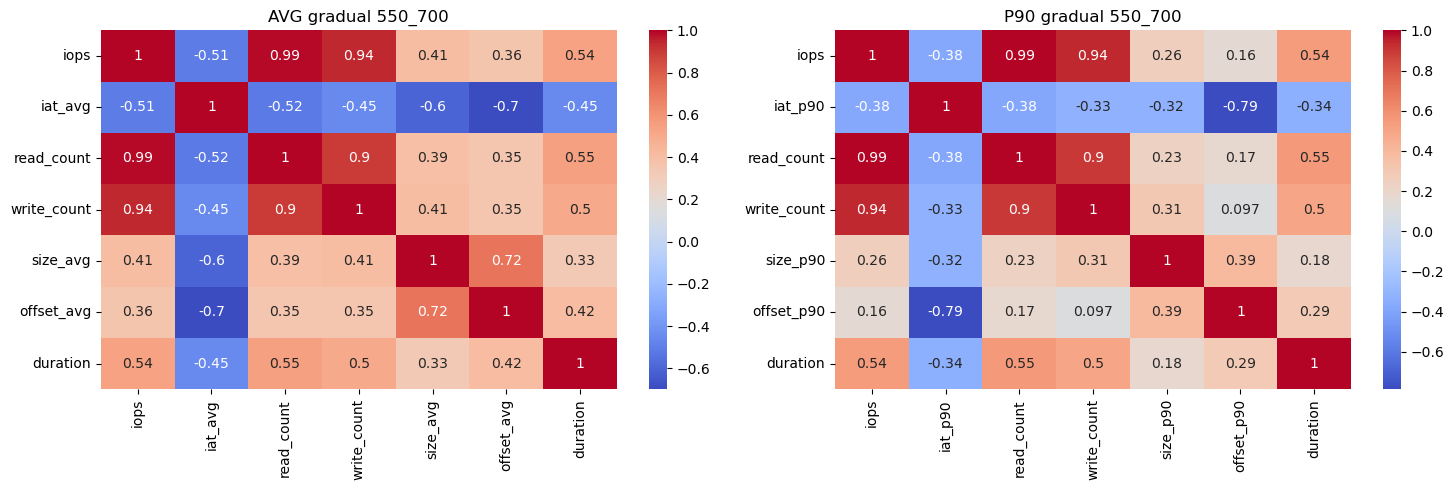

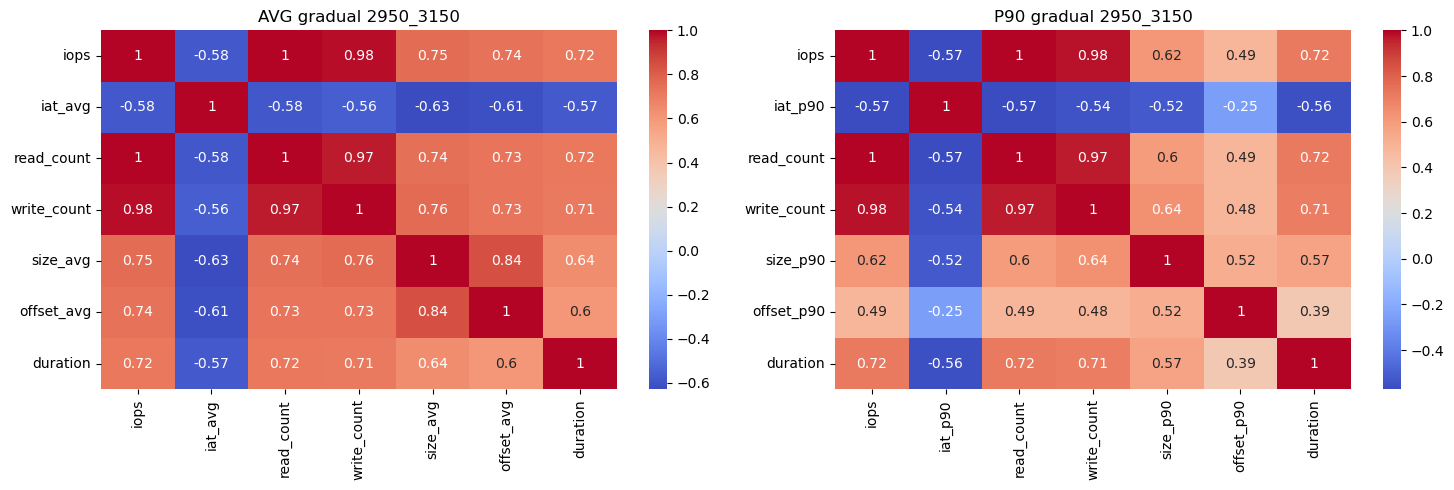

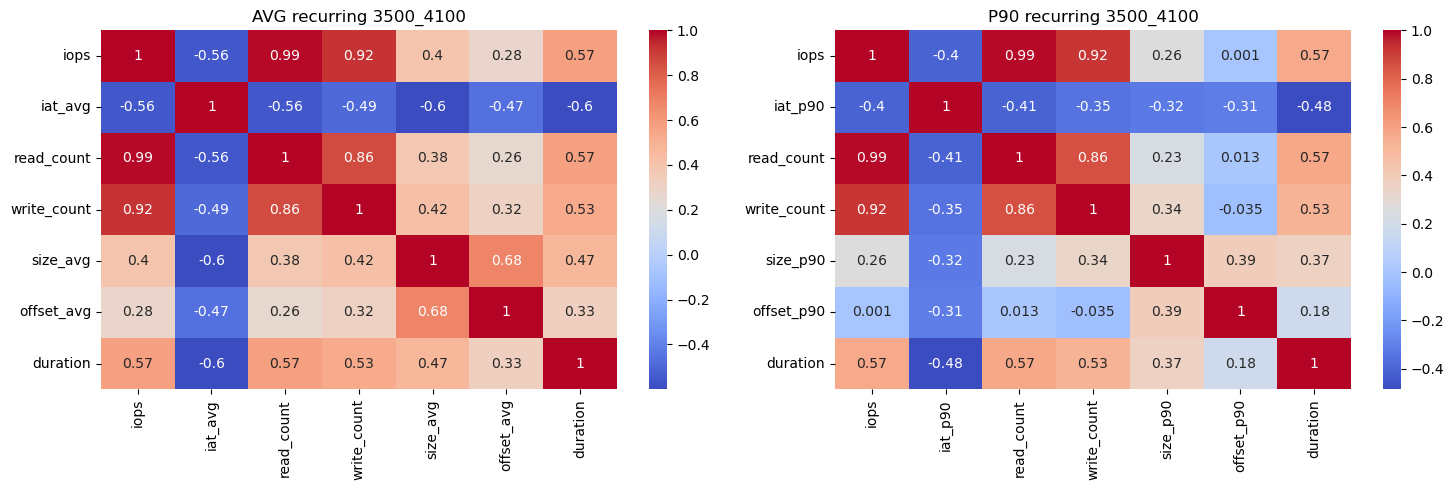

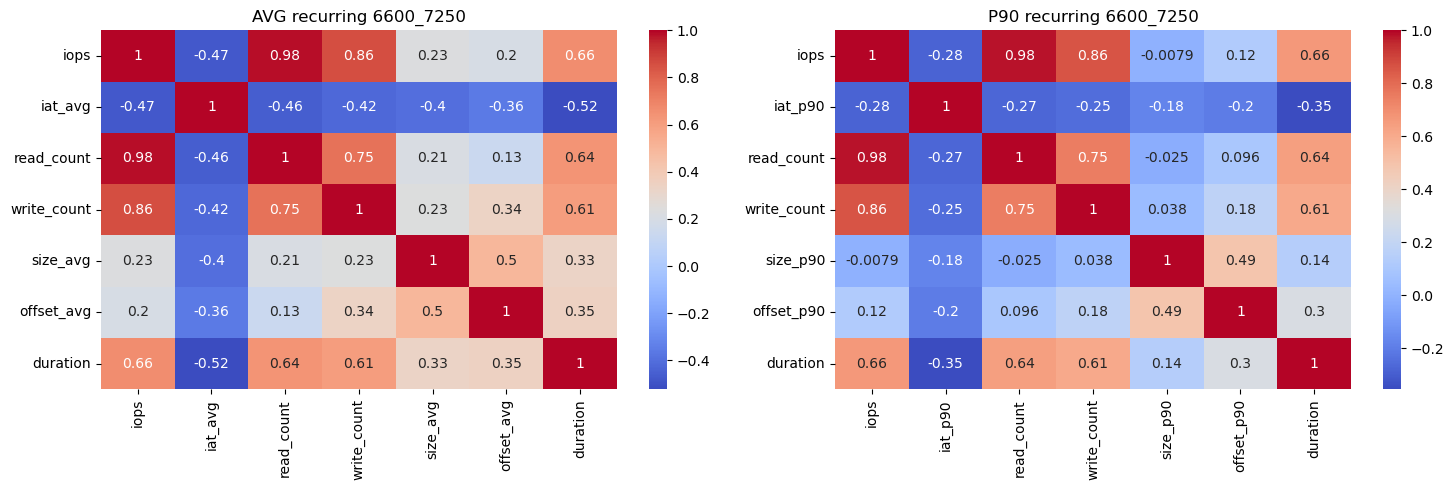

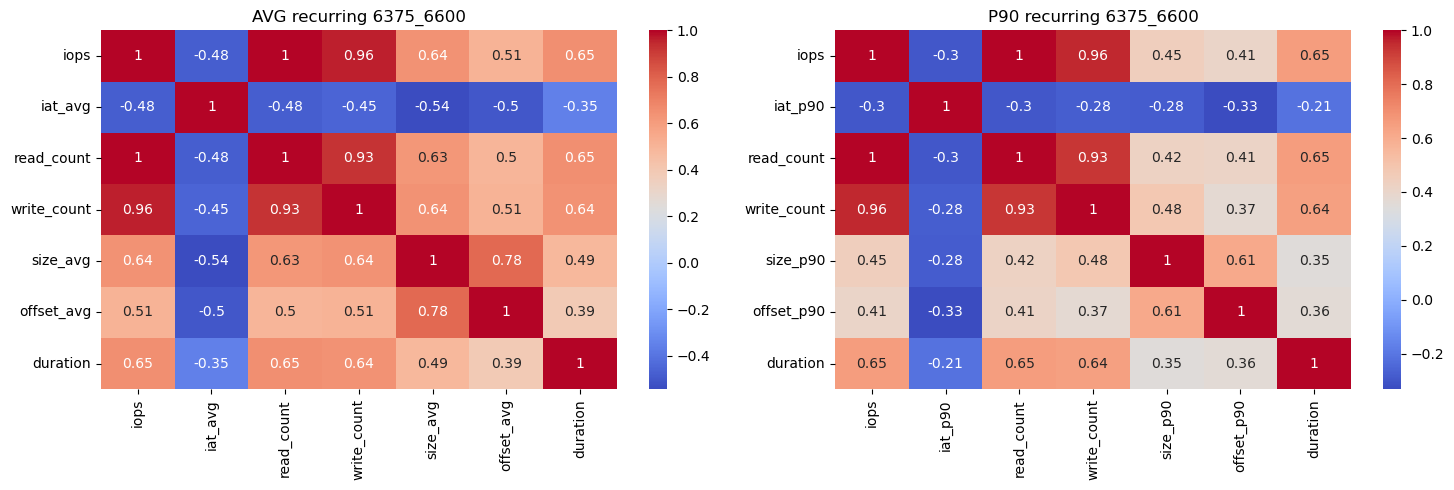

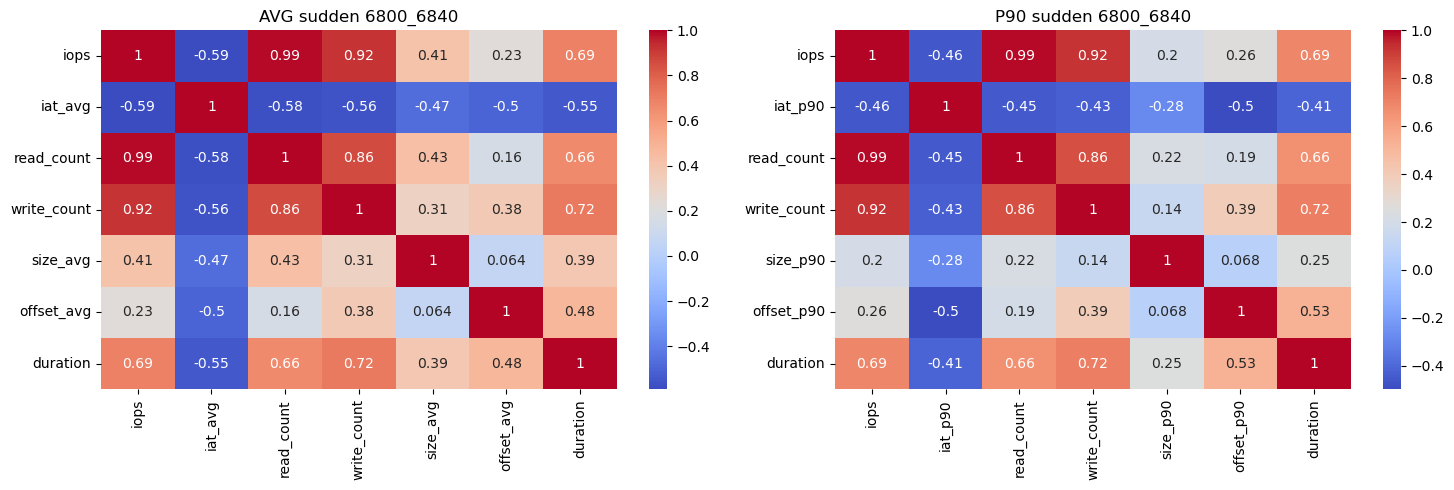

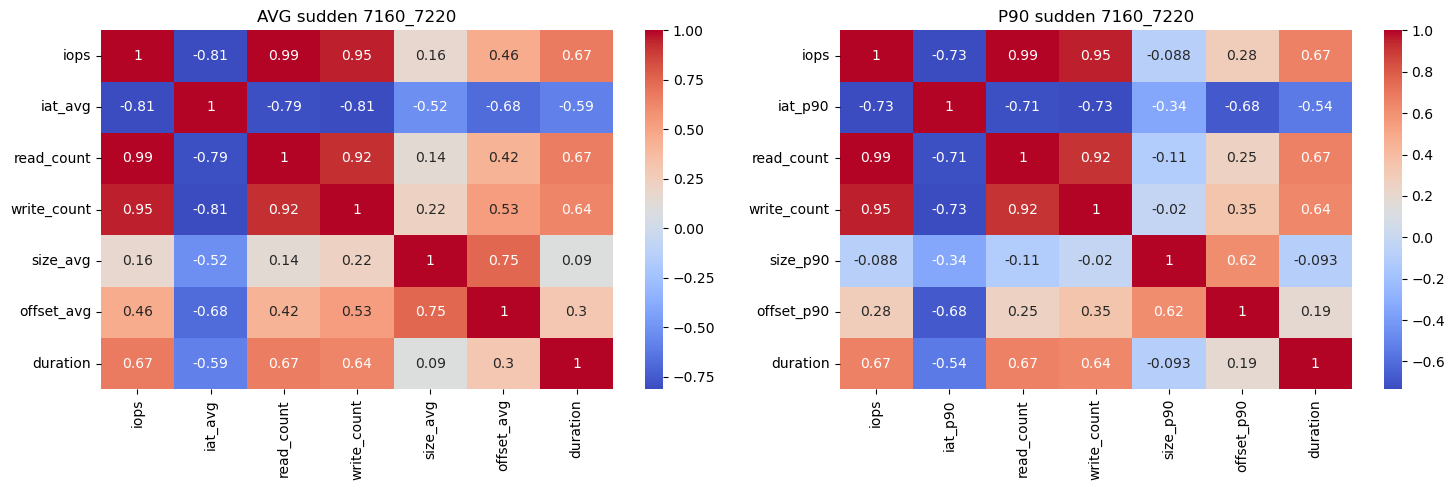

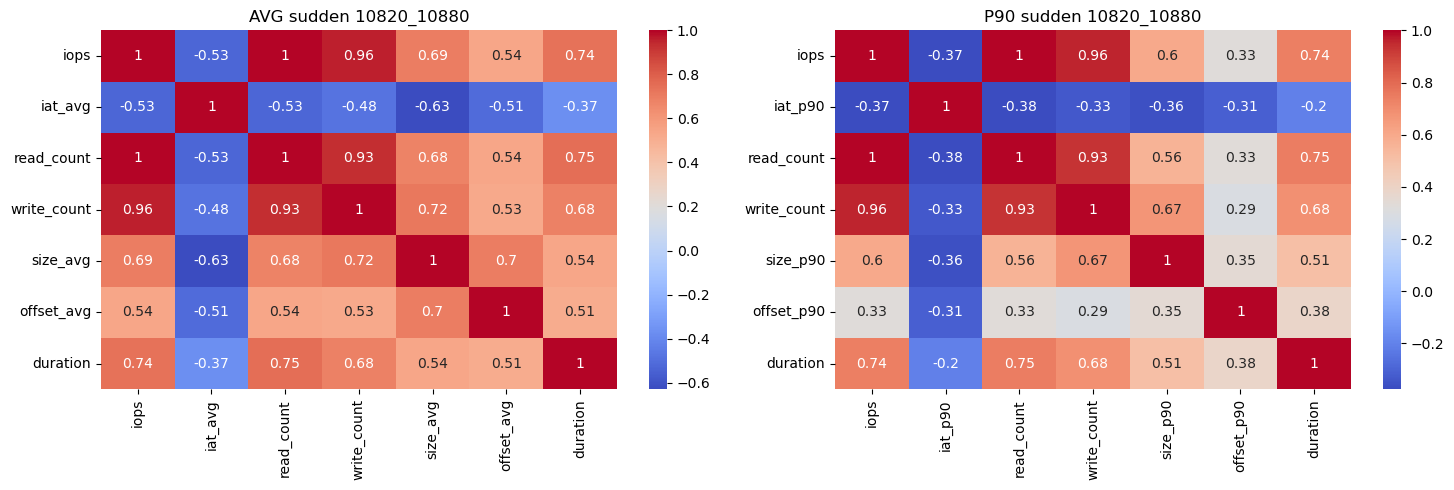

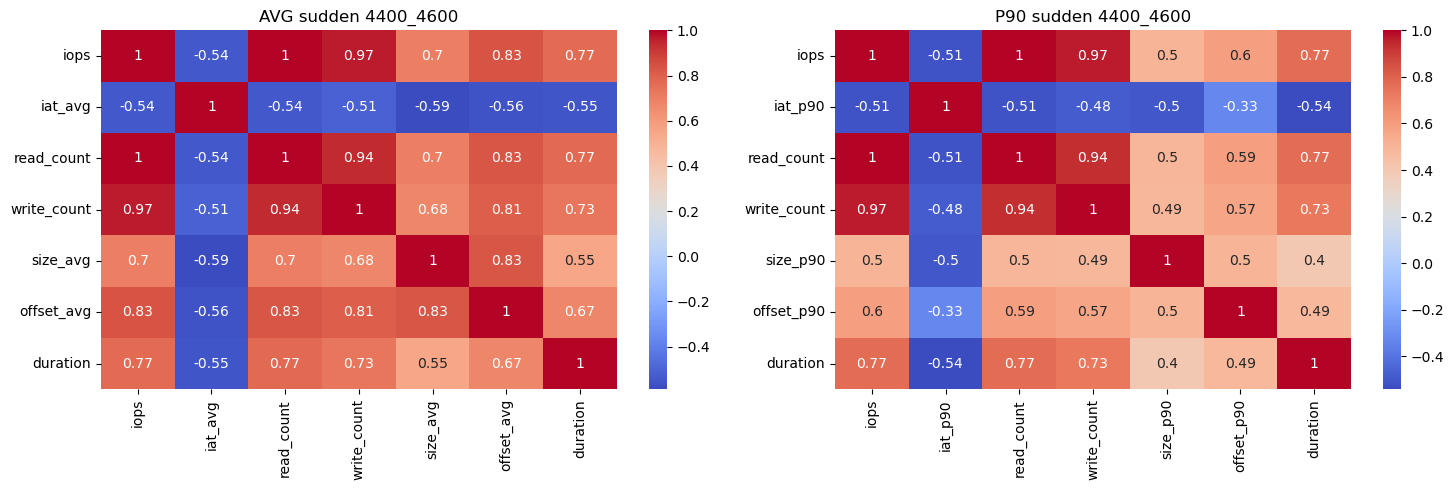

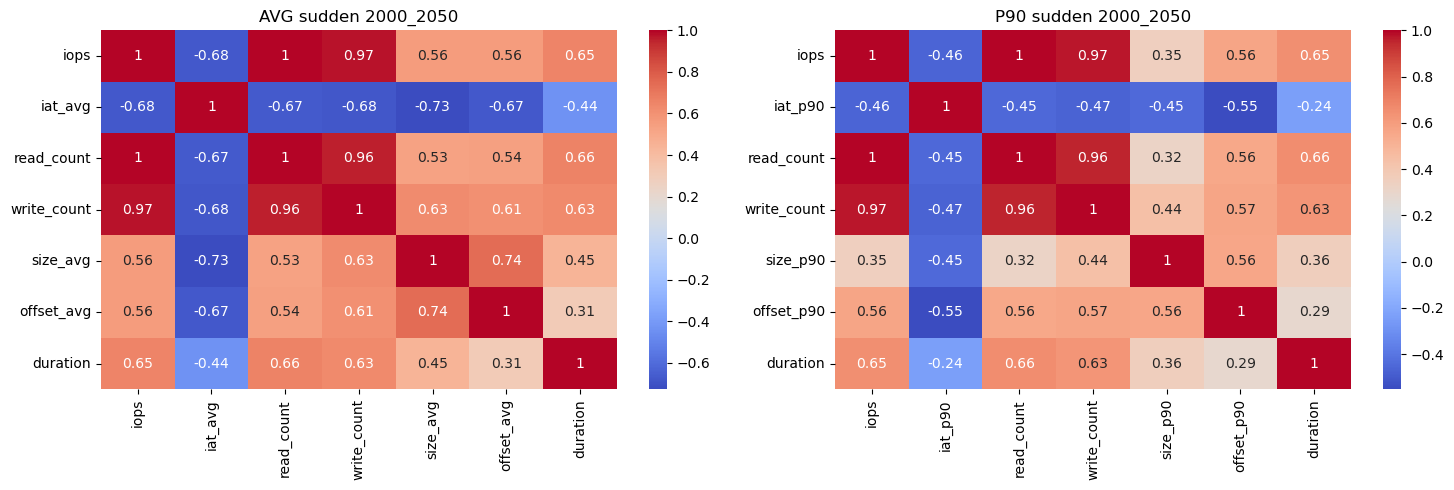

In [13]:
# For every start and end index, get the corresponding rows from the csv_characteristic

columns_avg = ['iops','iat_avg', 'read_count', 'write_count','size_avg', 'offset_avg', 'duration']
columns_p90 = ['iops','iat_p90', 'read_count', 'write_count','size_p90', 'offset_p90', 'duration']

columns_to_plot = [{"name": "AVG", "column":columns_avg}, {"name": "P90", "column":columns_p90}]
for start, end, type in zip(start_indices, end_indices, types):
    # get csv starting from start, up to end
    # do it by index
    csv_range = csv_characteristic[start:end]
    # Plot a heatmap of all numeric columns
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    
    
    # get the numeric columns
    numeric_columns = csv_range.select_dtypes(include=np.number)
    # Determine the number of columns to plot
    num_plots = len(columns_to_plot)
    num_cols = 2  # Adjust this to set the number of columns in your subplot grid
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed

    # Flatten axes array for easy iteration if it's a 2D array
    axes = axes.flatten()

    for i, column_json in enumerate(columns_to_plot):
        # plot the heatmap
        name_plot = column_json["name"]
        columns = column_json["column"]
        # make heatmap color scheme blue and red
        
        sns.heatmap(numeric_columns[columns].corr(), annot=True, ax=axes[i], cmap="coolwarm")
        # sns.heatmap(numeric_columns[columns].corr(), annot=True, ax=axes[i])
        axes[i].set_title(f"{name_plot} {type} {start}_{end}")

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    
    

# Heatmap Input & Latency / Rejects

In [25]:
dir_results = "char_replayed_full/"

csv_paths=[]
from pathlib import Path
import glob

# get every results.csv in this dir_results folder, recursive, do it by globbing
for path in glob.iglob(dir_results + '/**/per_window_characteristics.csv', recursive=True):
    csv_paths.append(path)
    
csv_paths

['char_replayed_full/incremental/1150_1800/per_window_characteristics.csv',
 'char_replayed_full/incremental/11350_11700/per_window_characteristics.csv',
 'char_replayed_full/incremental/3000_3800/per_window_characteristics.csv',
 'char_replayed_full/incremental/5150_5300/per_window_characteristics.csv',
 'char_replayed_full/gradual/2540_2580/per_window_characteristics.csv',
 'char_replayed_full/gradual/6350_6650/per_window_characteristics.csv',
 'char_replayed_full/gradual/8700_8850/per_window_characteristics.csv',
 'char_replayed_full/gradual/550_700/per_window_characteristics.csv',
 'char_replayed_full/gradual/2950_3150/per_window_characteristics.csv',
 'char_replayed_full/recurring/3500_4100/per_window_characteristics.csv',
 'char_replayed_full/recurring/6600_7250/per_window_characteristics.csv',
 'char_replayed_full/recurring/6375_6600/per_window_characteristics.csv',
 'char_replayed_full/sudden/6800_6840/per_window_characteristics.csv',
 'char_replayed_full/sudden/7160_7220/per_w

char_replayed_full/incremental/1150_1800/per_window_characteristics.csv
Start index:  1150  End index:  1800  Type:  incremental


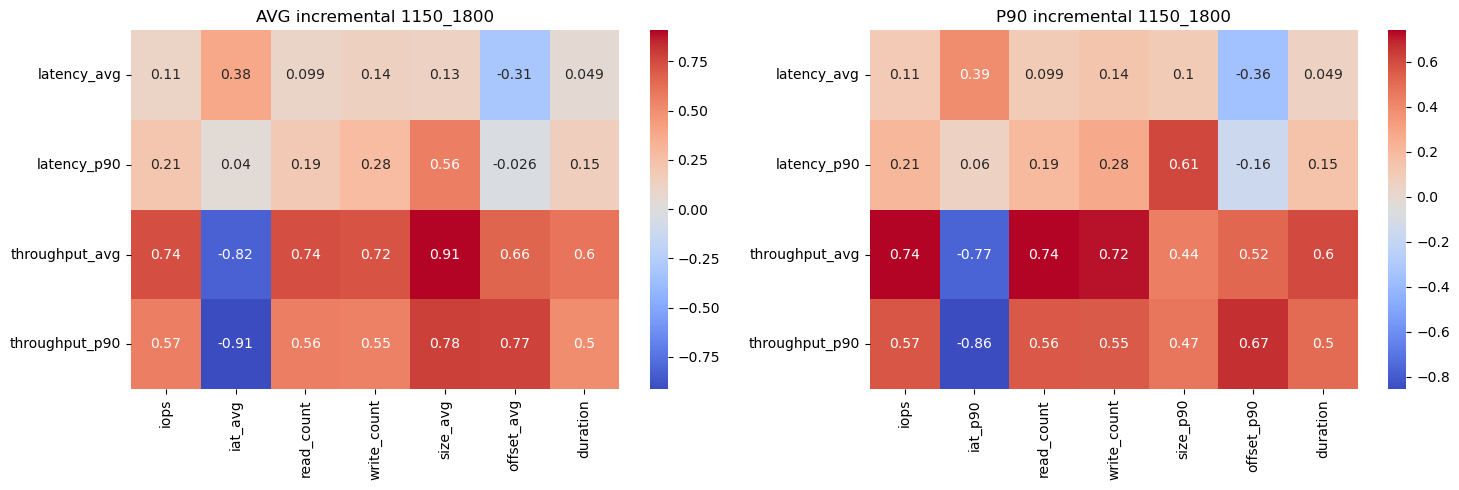

char_replayed_full/incremental/11350_11700/per_window_characteristics.csv
Start index:  11350  End index:  11700  Type:  incremental


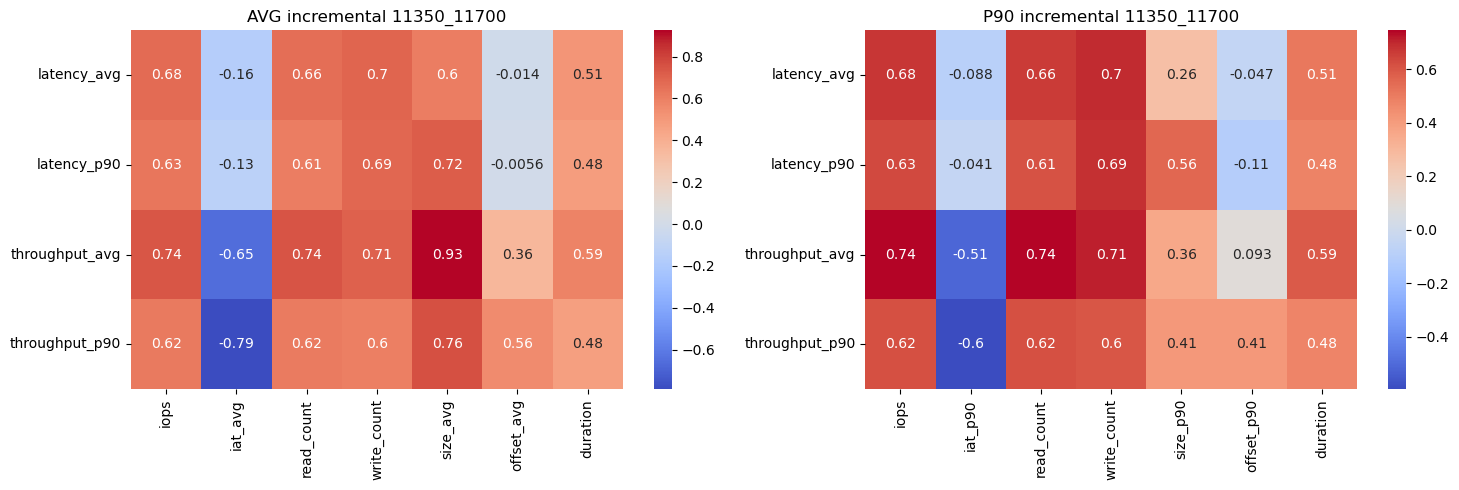

char_replayed_full/incremental/3000_3800/per_window_characteristics.csv
Start index:  3000  End index:  3800  Type:  incremental


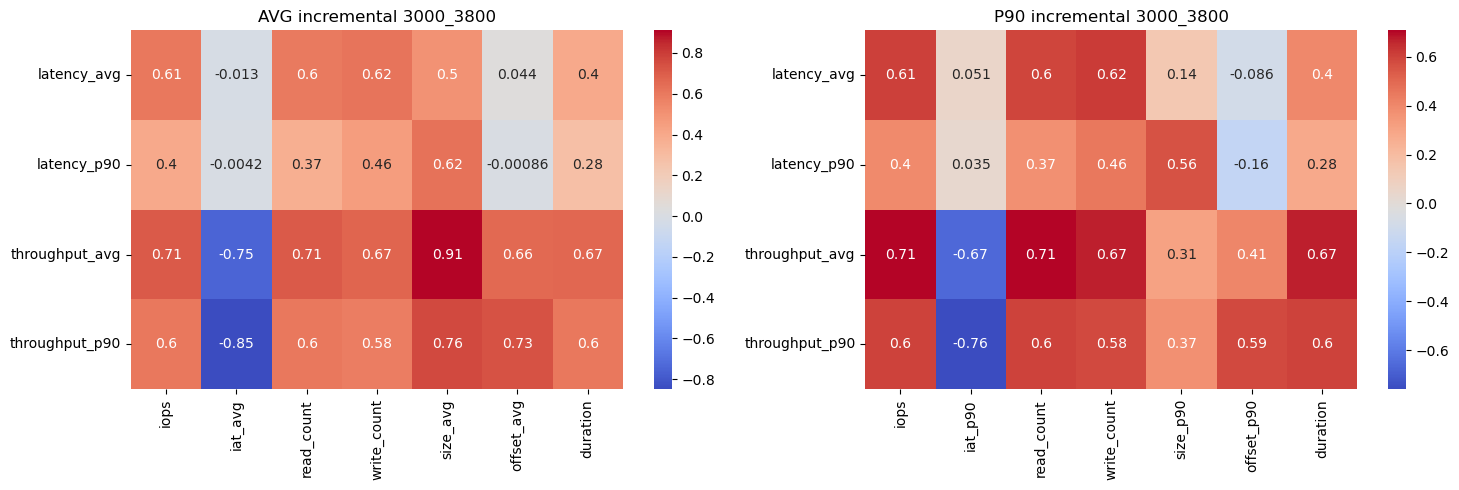

char_replayed_full/incremental/5150_5300/per_window_characteristics.csv
Start index:  5150  End index:  5300  Type:  incremental


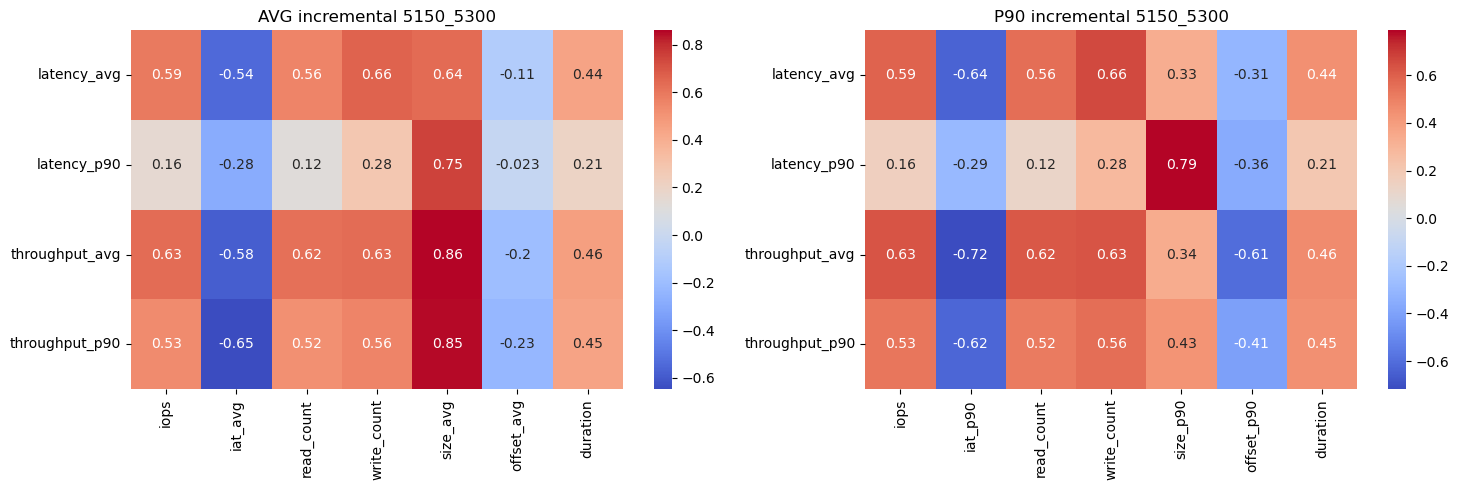

char_replayed_full/gradual/2540_2580/per_window_characteristics.csv
Start index:  2540  End index:  2580  Type:  gradual


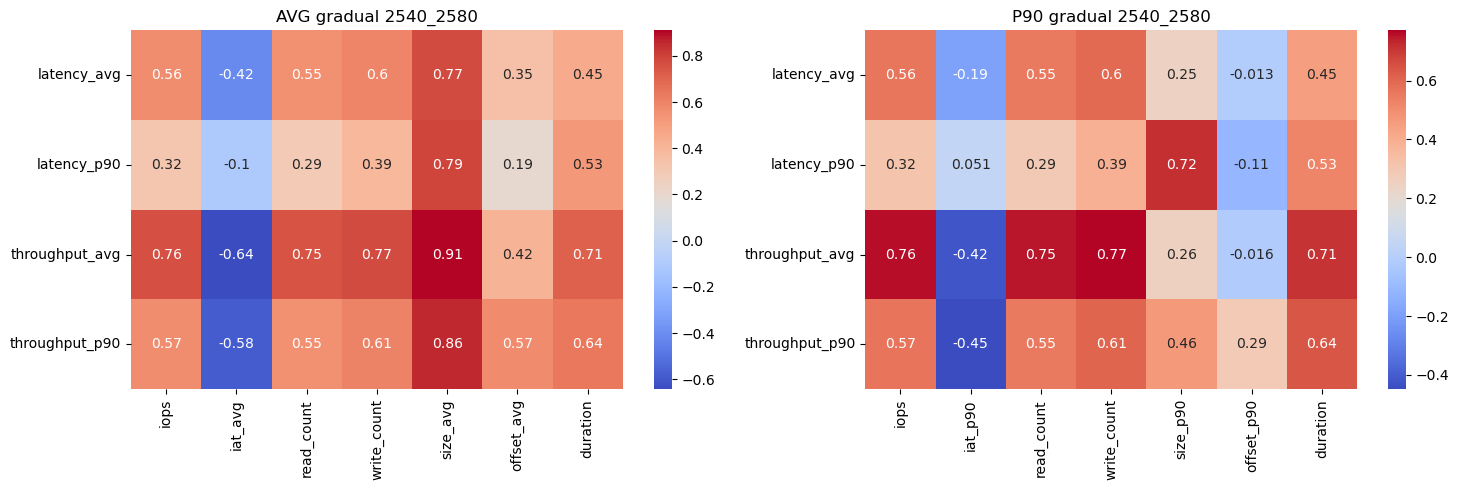

char_replayed_full/gradual/6350_6650/per_window_characteristics.csv
Start index:  6350  End index:  6650  Type:  gradual


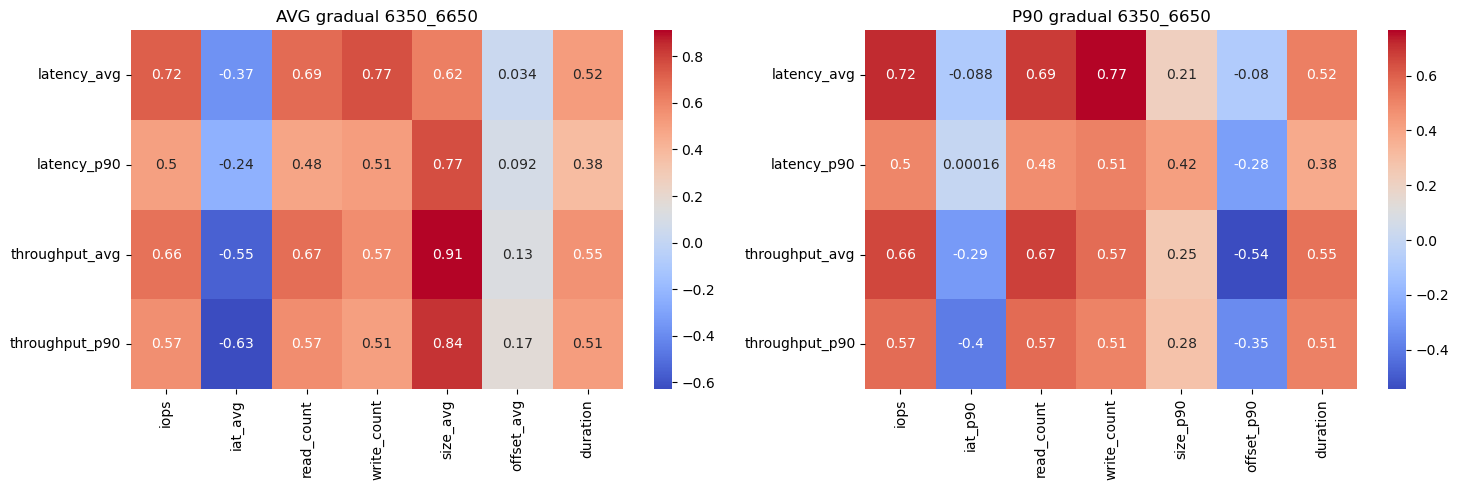

char_replayed_full/gradual/8700_8850/per_window_characteristics.csv
Start index:  8700  End index:  8850  Type:  gradual


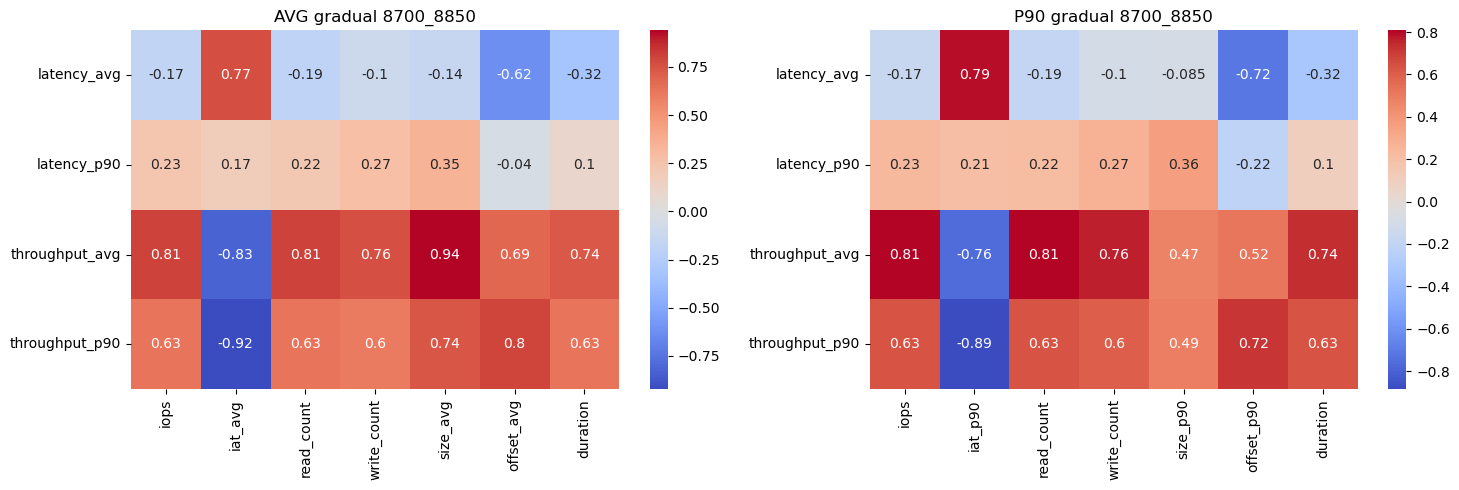

char_replayed_full/gradual/550_700/per_window_characteristics.csv
Start index:  550  End index:  700  Type:  gradual


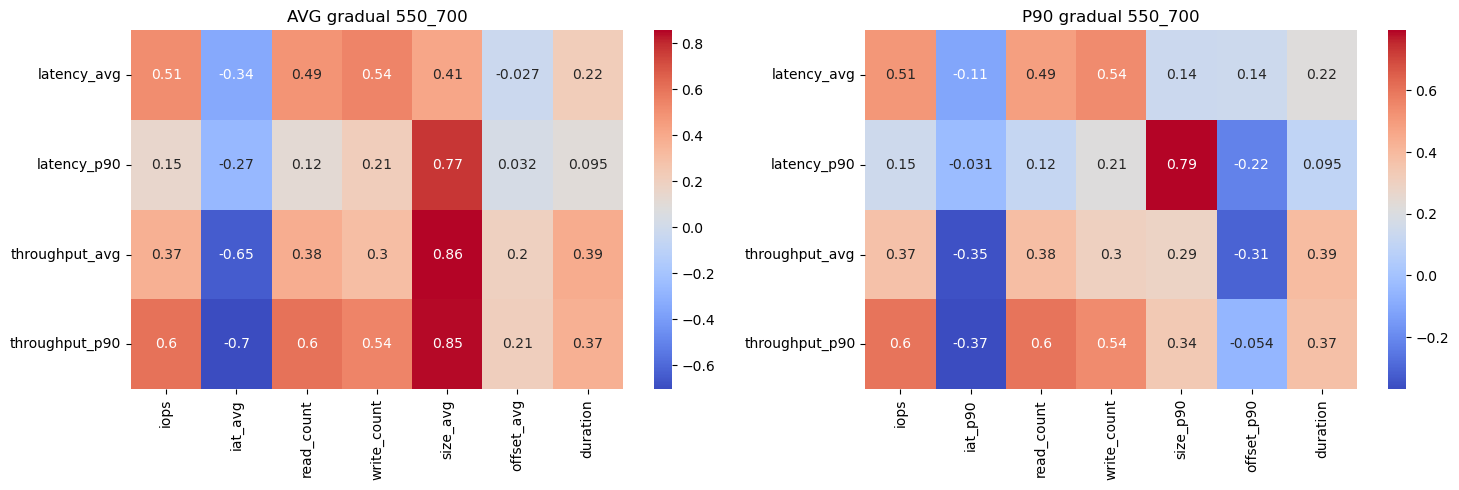

char_replayed_full/gradual/2950_3150/per_window_characteristics.csv
Start index:  2950  End index:  3150  Type:  gradual


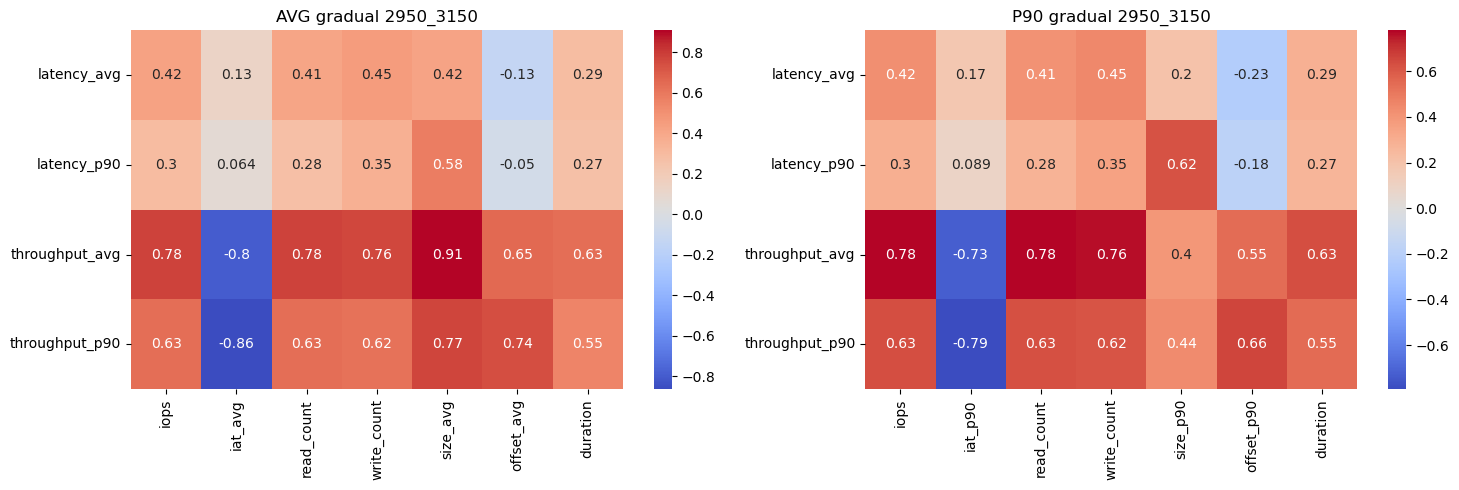

char_replayed_full/recurring/3500_4100/per_window_characteristics.csv
Start index:  3500  End index:  4100  Type:  recurring


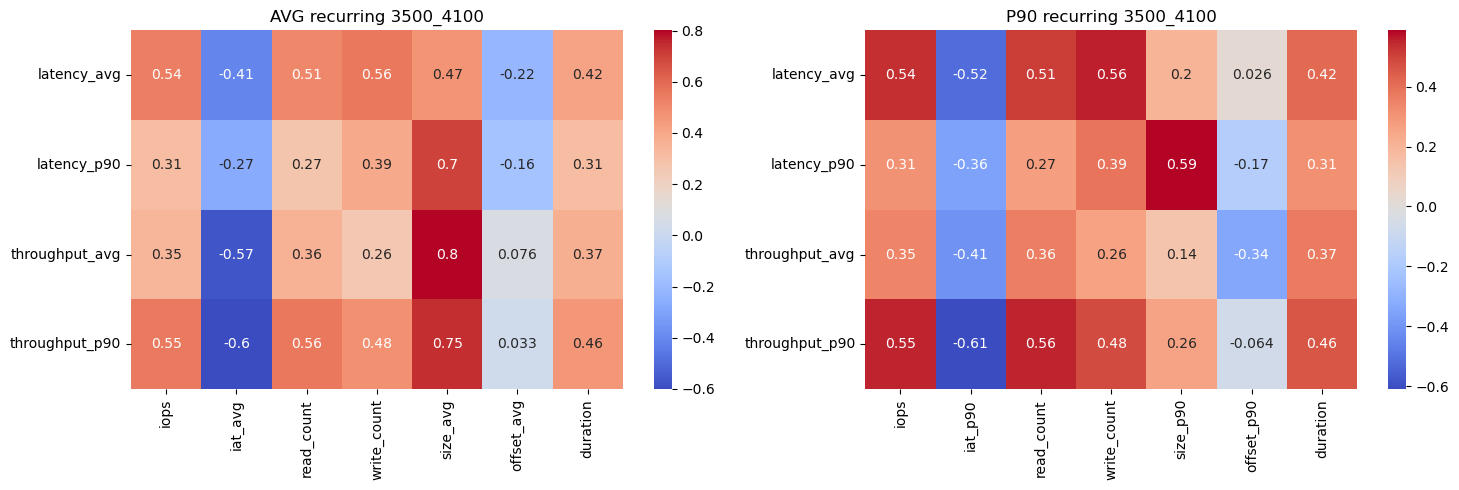

char_replayed_full/recurring/6600_7250/per_window_characteristics.csv
Start index:  6600  End index:  7250  Type:  recurring


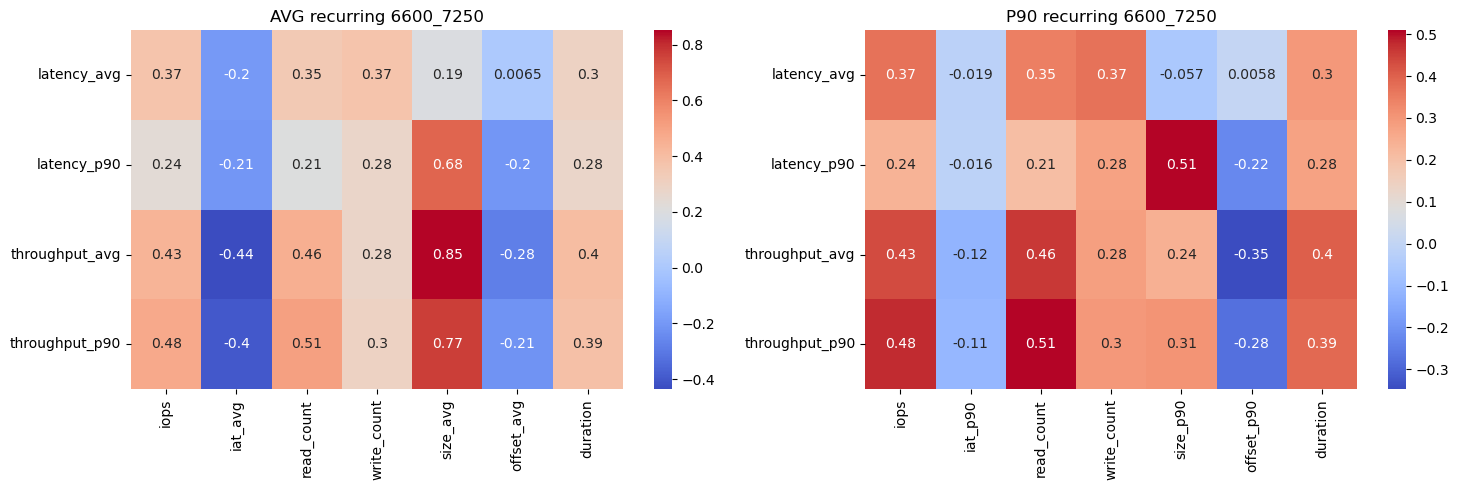

char_replayed_full/recurring/6375_6600/per_window_characteristics.csv
Start index:  6375  End index:  6600  Type:  recurring


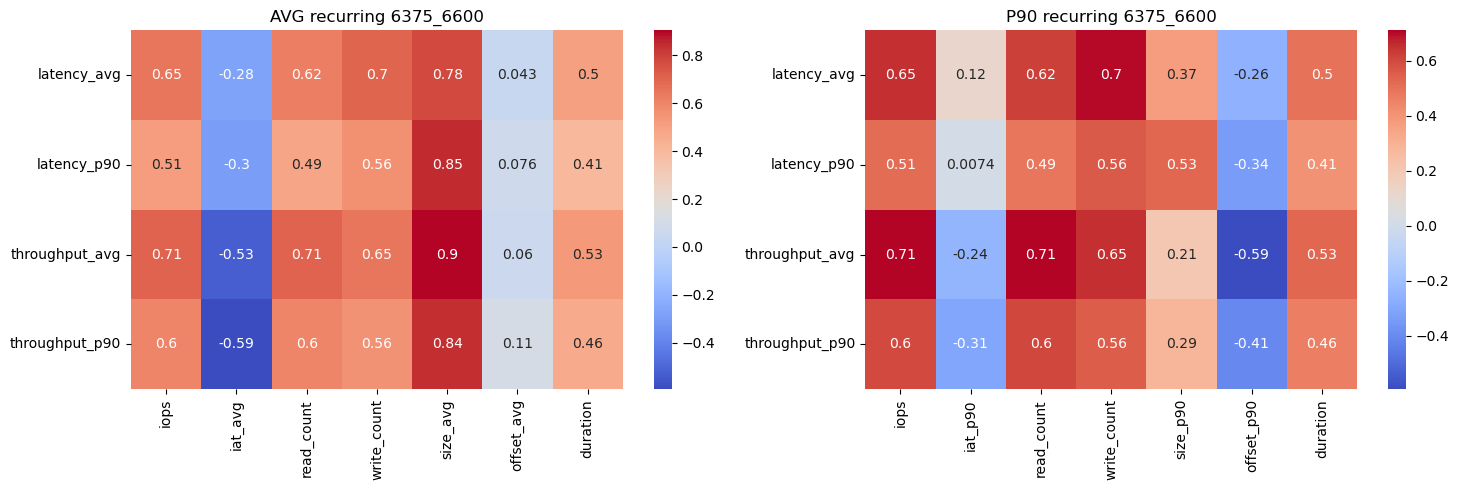

char_replayed_full/sudden/6800_6840/per_window_characteristics.csv
Start index:  6800  End index:  6840  Type:  sudden


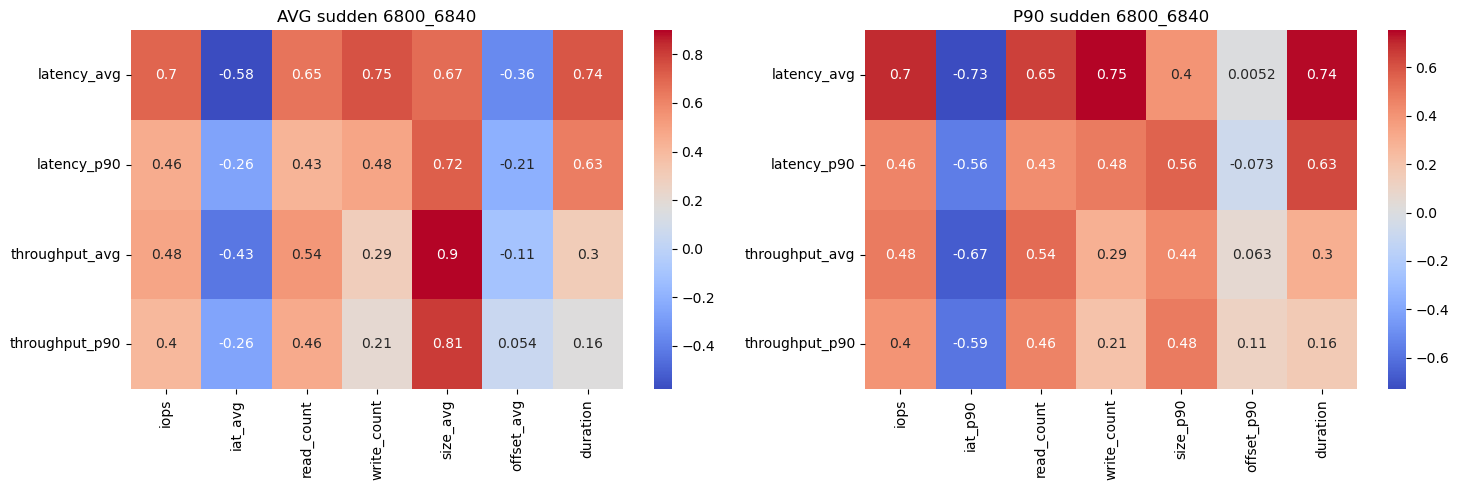

char_replayed_full/sudden/7160_7220/per_window_characteristics.csv
Start index:  7160  End index:  7220  Type:  sudden


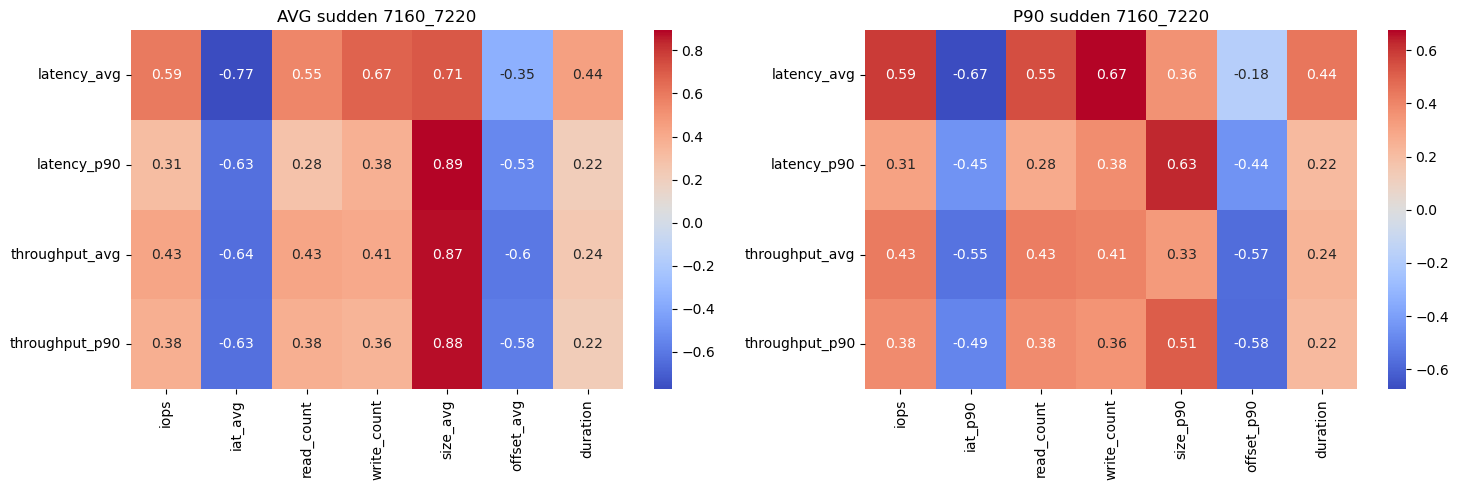

char_replayed_full/sudden/10820_10880/per_window_characteristics.csv
Start index:  10820  End index:  10880  Type:  sudden


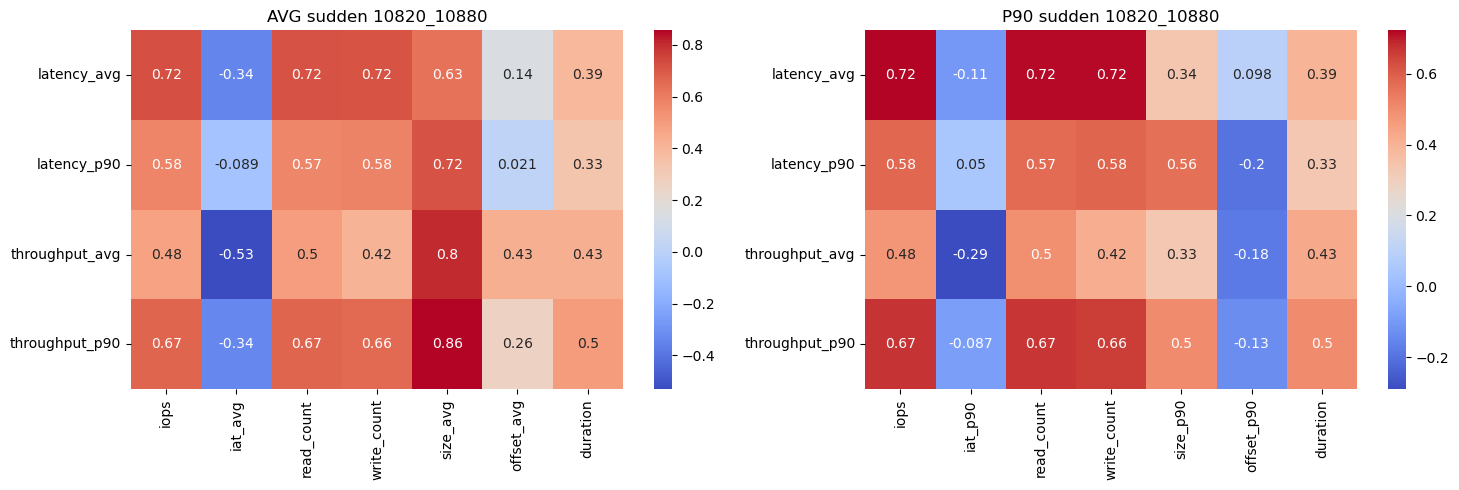

char_replayed_full/sudden/4400_4600/per_window_characteristics.csv
Start index:  4400  End index:  4600  Type:  sudden


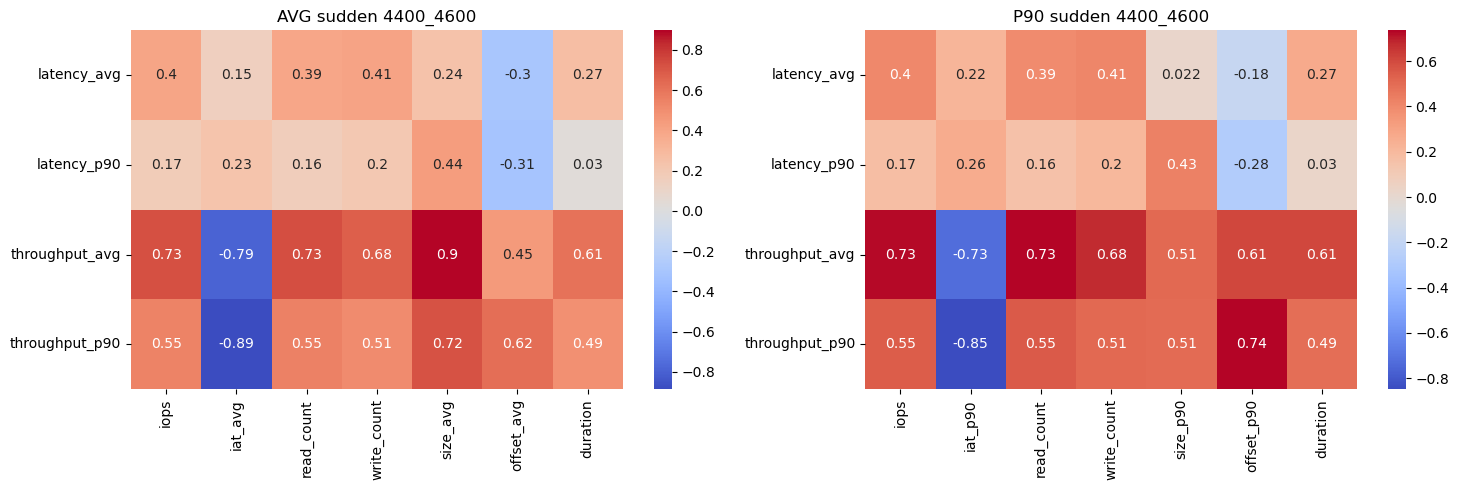

char_replayed_full/sudden/2000_2050/per_window_characteristics.csv
Start index:  2000  End index:  2050  Type:  sudden


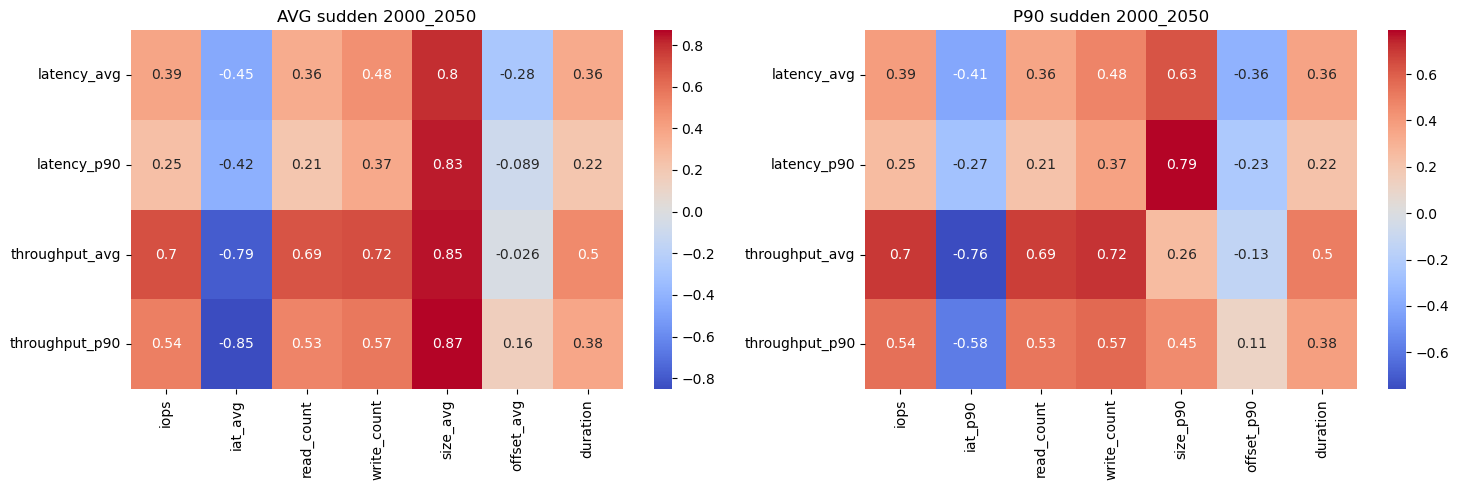

In [36]:
columns_avg = ['iops','iat_avg', 'read_count', 'write_count','size_avg', 'offset_avg', 'duration']
columns_p90 = ['iops','iat_p90', 'read_count', 'write_count','size_p90', 'offset_p90', 'duration']

target_metric = ["latency_avg", "latency_p90", "throughput_avg", "throughput_p90"]

columns_to_plot = [{"name": "AVG", "column":columns_avg}, {"name": "P90", "column":columns_p90}]

for path in csv_paths:
    print(path)
    # get the start and end indices, use regex and extract \d+_\d+
    regex_match = re.search(r"\d+_\d+", str(path))
    # search for gradual, sudden, incremental, or recurring
    type = re.search(r"gradual|sudden|incremental|recurring", str(path)).group(0)
    start = int(regex_match.group(0).split("_")[0])
    end = int(regex_match.group(0).split("_")[1])
    print("Start index: ", start, " End index: ", end, " Type: ", type)
    
    df_full = pd.read_csv(path)
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    
    
    # get the numeric columns, including floats
    numeric_columns = df_full.select_dtypes(include=np.number)

    
    # Determine the number of columns to plot
    num_plots = len(columns_to_plot)
    num_cols = 2  # Adjust this to set the number of columns in your subplot grid
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed

    # Flatten axes array for easy iteration if it's a 2D array
    axes = axes.flatten()

    for i, column_json in enumerate(columns_to_plot):
        # plot the heatmap
        name_plot = column_json["name"]
        columns = column_json["column"]
        # make heatmap color scheme blue and red
        
        # Compute the correlation matrix for the specified columns and the target metric
        corr_matrix = numeric_columns[columns + target_metric].corr()
        
        # Extract the correlations involving the target metric
        target_corr = corr_matrix.loc[target_metric, columns]
        
        # Convert the series to a DataFrame for easier plotting
        target_corr_df = target_corr
        
        # Plot the heatmap
        sns.heatmap(target_corr_df, annot=True, ax=axes[i], cmap="coolwarm")
        axes[i].set_title(f"{name_plot} {type} {start}_{end}")


    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    
    

# Heatmap with Model

In [13]:
experiments_path = "runs/exp/tencent/1063/1m/iops/experiments"

# loop for results.csv
exp_csvs = []

for path in Path(experiments_path).rglob("results.csv"):
    exp_csvs.append(path)

In [38]:
# id is in following format incremental_3000-3800
import re
import pandas as pd

df_compiled_exp = pd.DataFrame()

for path in exp_csvs:
    path = str(path)
    # print(path) if "retrain" in path else None
    # search for sudden, gradual, incremental, or recurring
    type = re.search(r'(sudden|gradual|incremental|recurring)', path).group(1)
    algo = "retrain" if "retrain" in path else "no_retrain"
    range_res = re.search(r'(\d+)_(\d+)', path)
    start = range_res.group(1)
    end = range_res.group(2)
    
    df_csv = pd.read_csv(path)
    print(df_csv["accuracy"], path) if "8700" in path else None
    
    # add to df_compiled
    df_csv['id'] = f"{type}_{start}-{end}"
    df_csv['algo'] = algo
    # make chunk_number column, range from 0 to len(df_csv)
    df_csv['chunk_number'] = df_csv.index
    df_compiled_exp = pd.concat([df_compiled_exp, df_csv])
    

0      0.759947
1      0.738497
2      0.758963
3      0.751005
4      0.773182
         ...   
146    0.433824
147    0.512438
148    0.836066
149    0.388889
150    0.659033
Name: accuracy, Length: 151, dtype: float64 runs/exp/tencent/1063/1m/iops/experiments/gradual/8700_8850/single.initial-only/results.csv
0      0.759947
1      0.738497
2      0.770837
3      0.754690
4      0.780124
         ...   
146    0.882353
147    0.756219
148    0.721311
149    0.500000
150    0.806616
Name: accuracy, Length: 151, dtype: float64 runs/exp/tencent/1063/1m/iops/experiments/gradual/8700_8850/single.retrain.window/results.csv


In [39]:
dir_results = "char_replayed_full/"

csv_paths=[]
from pathlib import Path
import glob

df_char = pd.DataFrame()
# get every results.csv in this dir_results folder, recursive, do it by globbing
for path in glob.iglob(dir_results + '/**/per_window_characteristics.csv', recursive=True):
    # get the start and end indices, use regex and extract \d+_\d+
    regex_match = re.search(r"\d+_\d+", str(path))
    # search for gradual, sudden, incremental, or recurring
    type = re.search(r"gradual|sudden|incremental|recurring", str(path)).group(0)
    start = int(regex_match.group(0).split("_")[0])
    end = int(regex_match.group(0).split("_")[1])
    
    df_char_temp = pd.read_csv(path)
    df_char_temp["id"] = f"{type}_{start}-{end}"
    df_char_temp["chunk_number"] = df_char_temp.index
    df_char = pd.concat([df_char, df_char_temp])
    
    

In [40]:
print(len(df_char))
print(len(df_compiled_exp))

4692
9370


In [41]:
# merge on 'id' and 'chunk_number'
df_final = pd.merge(df_compiled_exp, df_char, on=['id', 'chunk_number'])

      accuracy  precision    recall        f1    auc    fpr    fnr   entropy  \
4588  0.759947   0.767640  0.673714  0.717617  0.753  0.169  0.326  0.643092   
4589  0.759947   0.767640  0.673714  0.717617  0.753  0.169  0.326  0.643092   
4590  0.738497   0.706661  0.567618  0.629553  0.708  0.152  0.432  0.611215   
4591  0.738497   0.706661  0.567618  0.629553  0.708  0.152  0.432  0.611215   
4592  0.758963   0.782436  0.561702  0.653945  0.728  0.107  0.438  0.553023   
...        ...        ...       ...       ...    ...    ...    ...       ...   
4885  0.721311   0.952381  0.377358  0.540541  0.681  0.014  0.621  0.344879   
4886  0.388889   0.083333  1.000000  0.153846  0.676  0.646  0.000  0.705927   
4887  0.500000   0.100000  1.000000  0.181818  0.735  0.528  0.000  0.536217   
4888  0.659033   0.423423  0.940000  0.583851  0.752  0.437  0.060  0.816834   
4889  0.806616   0.639535  0.550000  0.591398  0.722  0.106  0.450  0.519665   

      uncertainty  num_io_x  ...  write

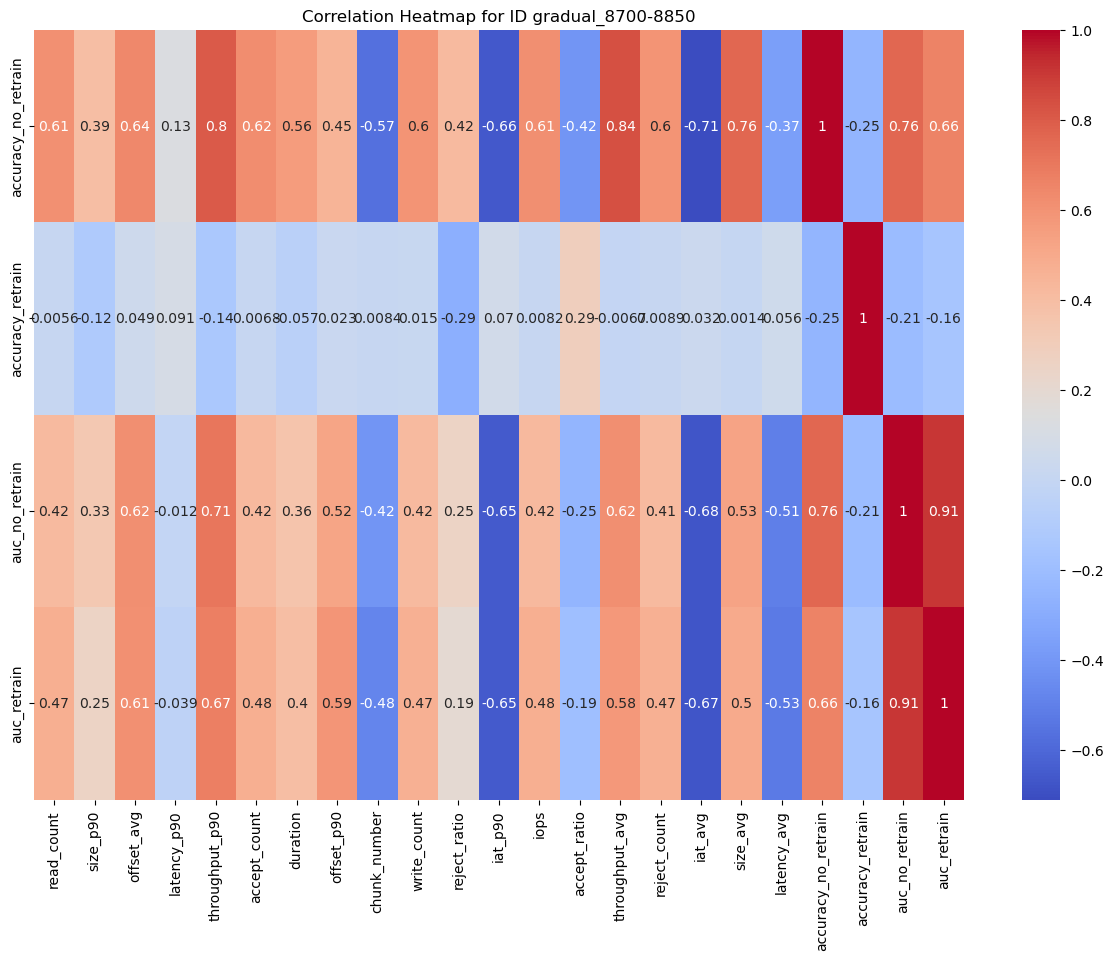

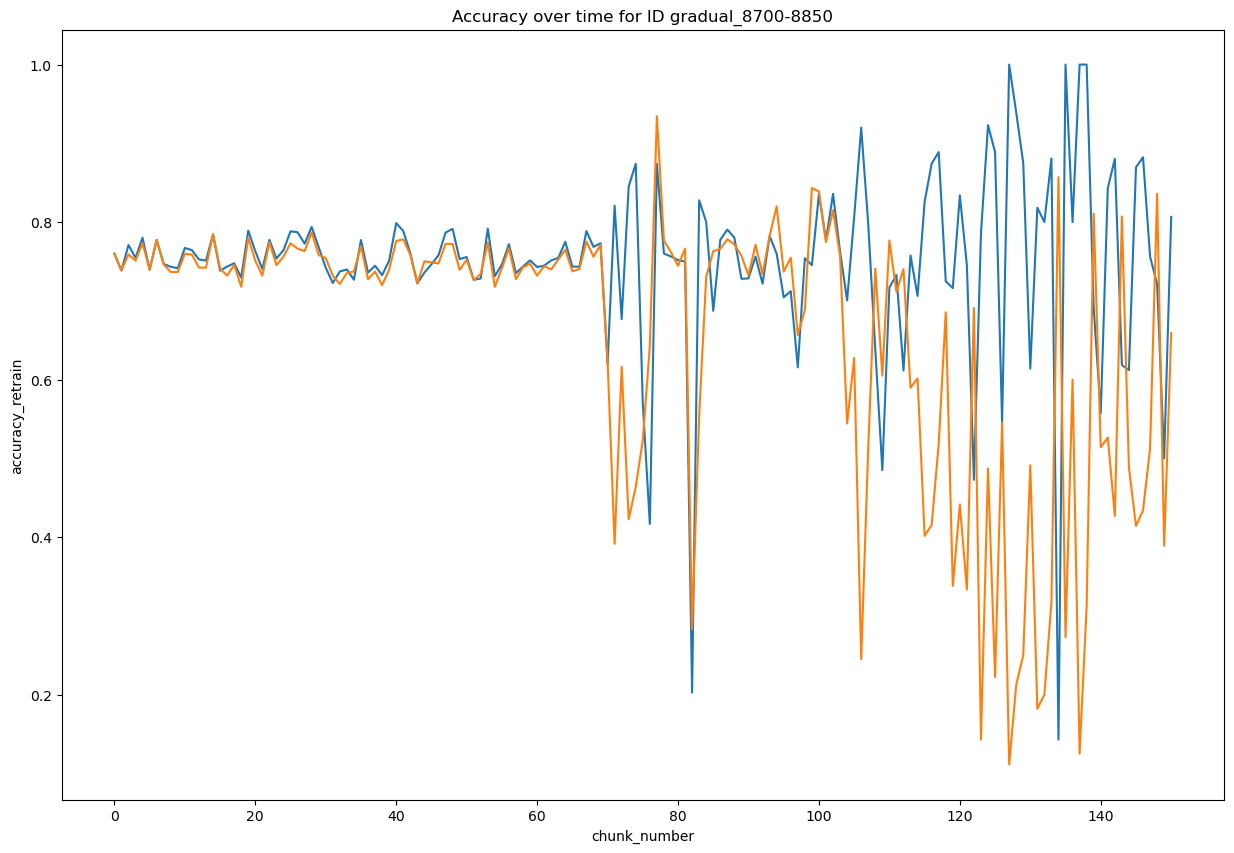

In [45]:
# Heatmap correlation
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

columns_avg = ['iops', 'iat_avg', 'reject_count', 'reject_ratio', 'accept_count', 'accept_ratio', 'read_count', 'write_count', 'size_avg', 'offset_avg', 'latency_avg', 'throughput_avg', 'duration']
columns_p90 = ['iops', 'iat_p90', 'reject_count', 'reject_ratio', 'accept_count', 'accept_ratio', 'read_count', 'write_count', 'size_p90', 'offset_p90', 'latency_p90', 'throughput_p90', 'duration']
target_metrics = ['accuracy', 'auc']

unique_id = df_final['id'].unique()


for id in unique_id:
    if "8700" not in id:
        continue
    
    df_id = df_final[df_final['id'] == id]
    print(df_id)
    
    
    df_pivot_accuracy = df_id.pivot(index='chunk_number', columns='algo', values='accuracy')
    df_pivot_auc = df_id.pivot(index='chunk_number', columns='algo', values='auc')
    
    # Rename columns to include 'accuracy_' and 'auc_' prefixes
    df_pivot_accuracy.columns = [f'accuracy_{algo}' for algo in df_pivot_accuracy.columns]
    df_pivot_auc.columns = [f'auc_{algo}' for algo in df_pivot_auc.columns]
    
    # Combine the pivoted dataframes
    df_pivot_combined = pd.concat([df_pivot_accuracy, df_pivot_auc], axis=1)
    
    # Reset index to make 'chunk_number' a column again
    df_pivot_combined.reset_index(inplace=True)
    
    # Merge the combined pivoted dataframe with the columns_avg data
    df_to_plot = df_id[list(set(['chunk_number']+columns_avg+columns_p90))].drop_duplicates().merge(df_pivot_combined, on='chunk_number')
 
    # Compute the correlation matrix
    # drop chunk_ number
    # df_to_plot = df_to_plot.drop(columns=['chunk_number'])
    corr_matrix = df_to_plot.corr()
    
    # Target_metrics, see columns only if they contain str in target_metric
    target_metric_cols = [col for col in corr_matrix.columns if any(metric in col for metric in target_metric)]
    
    sub_corr_matrix = corr_matrix.loc[target_metric_cols, :]
    
    # Plot the heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(sub_corr_matrix, annot=True, cmap="coolwarm")
    plt.title(f"Correlation Heatmap for ID {id}")
    plt.show()
    
    # Line plot, accuracy and auc
    # Plot the lineplot
    plt.figure(figsize=(15, 10))
    sns.lineplot(data=df_to_plot, x='chunk_number', y='accuracy_retrain')
    sns.lineplot(data=df_to_plot, x='chunk_number', y='accuracy_no_retrain')
    plt.title(f"Accuracy over time for ID {id}")
    